#Preparing the data

In [0]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import sklearn
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import scipy
from scipy import stats

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
uploaded = files.upload()

Saving zap.csv to zap.csv


In [0]:
#reading data
data = pd.read_csv('zap.csv', sep='|', decimal = ",")

In [0]:
#visualizing data imported
data.head()

,Rent,Address,Street,Neighborhood,Area,Rooms,Bathrooms,Parking
0,\n R$ 32.000\n /mês,"Rua Marquês de São Vicente, Gávea",Rua Marquês de São Vicente,Gávea,\n 288 m²\n,0,0,5
1,\n R$ 4.000\n /mês,"Rua Uruguaiana, Centro",Rua Uruguaiana,Centro,\n 364 m²\n,0,2,0
2,\n R$ 6.000\n /mês,"Rua Ministro Ramos Monteiro, Leblon",Rua Ministro Ramos Monteiro,Leblon,\n 101 m²\n,3,3,1
3,\n R$ 1.100\n /mês,"Rua Conde de Porto Alegre, Rocha",Rua Conde de Porto Alegre,Rocha,\n 50 m²\n,1,1,0
4,\n R$ 1.450\n /mês,"Estrada Bougainville, Itanhangá",Estrada Bougainville,Itanhangá,\n 130 m²\n,2,1,2


In [0]:
#removing "noises" and blank spaces from data
for i in range(0, len(data['Rent'])):
    data['Rent'][i] = data['Rent'][i].replace('\n', "")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
#removing coin symbol "R$" and "/mês"(/month), in order to stay only with numbers for the rents;
#removing blank spaces from the beginning and end of each field in "Rent" column
for i in range(0, len(data['Rent'])):
    data['Rent'][i] = data['Rent'][i].replace('R$', "")
    data['Rent'][i] = data['Rent'][i].replace('/mês', "")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [0]:
#cleaning "Area" column, in order to stay only with numbers
for i in range(0, len(data['Area'])):
    data['Area'][i] = data['Area'][i].replace('\n', "")
    data['Area'][i] = data['Area'][i].replace('m²', "")
    data['Area'][i] = data['Area'][i].strip()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

In [0]:
#verifying if there are blank spaces in the columns 'Street' and 'Neighborhood'
print(data['Street'][0])
print(data['Neighborhood'][0])

Rua Marquês de São Vicente
 Gávea


In [0]:
#removing blank spaces from "Neighborhood" column
for i in range(0, len(data['Neighborhood'])):
    data['Neighborhood'][i] = data['Neighborhood'][i].strip()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
#removing 'Address' column
del data['Address']

In [0]:
#visualizing the clean data
data.head()

,Rent,Street,Neighborhood,Area,Rooms,Bathrooms,Parking
0,32.000,Rua Marquês de São Vicente,Gávea,288,0,0,5
1,4.000,Rua Uruguaiana,Centro,364,0,2,0
2,6.000,Rua Ministro Ramos Monteiro,Leblon,101,3,3,1
3,1.100,Rua Conde de Porto Alegre,Rocha,50,1,1,0
4,1.450,Estrada Bougainville,Itanhangá,130,2,1,2


In [0]:
#removing the '.''s in the Rent column, in order to avoid problems with decimal notation;
#transforming "Area" column from string to integer and "Rent" column from string to float
for i in range(0, len(data['Area'])):
    data['Area'][i] = int(data['Area'][i])
    data['Rent'][i] = int(data['Rent'][i].replace('.', ''))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


#Exploratory Analysis

In [0]:
#grouping data by zones
Zone = []

for i in range(0, len(data)):
    if data['Neighborhood'][i] in ['Botafogo', 'Catete', 'Copacabana', 'Cosme Velho', 'Flamengo',
                                'Gávea', 'Humaitá', 'Ipanema', 'Jardim Botânico', 'Lagoa', 
                                'Laranjeiras', 'Leblon', 'Leme', 'Rocinha', 'São Conrado', 'Urca',
                                'Vidigal']:
        
        Zone.append('Sul')
        
    elif data['Neighborhood'][i] in ['Alto da Boa Vista', 'Andaraí', 'Grajaú', 'Maracanã', 
                                  'Praça da Bandeira', 'Tijuca', 'Vila Isabel', 'Abolição', 
                                  'Água Santa', 'Cachambi', 'Del Castilho', 'Encantado', 
                                  'Engenho de Dentro', 'Engenho Novo', 'Higienópolis', 'Jacaré',
                                  'Jacarezinho', 'Lins de Vasconcelos', 'Manguinhos', 
                                  'Maria da Graça', 'Méier', 'Piedade', 'Pilares', 'Riachuelo', 
                                  'Rocha', 'Sampaio', 'São Francisco Xavier', 'Todos os Santos',
                                  'Bonsucesso', 'Bancários', 'Cacuia', 'Cidade Universitária',
                                  'Cocotá', 'Freguesia', 'Galeão', 'Jardim Carioca', 'Jardim Guanabara',
                                  'Maré', 'Moneró', 'Olaria', 'Pitangueiras', 'Portuguesa', 
                                  'Praia da Bandeira', 'Ramos', 'Ribeira', 'Tauá', 'Zumbi',
                                  'Acari', 'Anchieta', 'Barros Filho', 'Bento Ribeiro',
                                  'Brás de Pina', 'Campinho', 'Cavalcanti', 'Cascadura',
                                  'Coelho Neto', 'Colégio', 'Complexo do Alemão', 'Cordovil',
                                  'Costa Barros', 'Engenheiro Leal', 'Engenho da Rainha', 'Guadalupe',
                                  'Honório Gurgel', 'Inhaúma', 'Irajá', 'Jardim América', 'Madureira',
                                  'Marechal Hermes', 'Oswaldo Cruz', 'Parada de Lucas', 
                                  'Parque Anchieta', 'Parque Colúmbia', 'Pavuna', 'Penha',
                                  'Penha Circular', 'Quintino Bocaiuva', 'Ricardo de Albuquerque',
                                  'Rocha Miranda', 'Tomás Coelho', 'Turiaçu', 'Vaz Lobo', 
                                  'Vicente de Carvalho', 'Vigário Geral', 'Vila da Penha', 'Vila Kosmos',
                                  'Vista Alegre']:
        
        Zone.append('Norte')
        
    elif data['Neighborhood'][i] in ['Anil', 'Barra da Tijuca', 'Camorim', 'Cidade de Deus',
                                     'Curicica', 'Freguesia de Jacarepaguá', 'Gardênia Azul',
                                     'Grumari', 'Itanhangá', 'Jacarepaguá', 'Joá', 'Praça Seca',
                                     'Pechincha', 'Recreio dos Bandeirantes', 'Tanque', 'Taquara',
                                     'Vargem Grande', 'Vargem Pequena', 'Vila Valqueire', 'Bangu',
                                     'Deodoro', 'Gericinó', 'Jardim Sulacap', 'Magalhães Bastos',
                                     'Padre Miguel', 'Realengo', 'Santíssimo', 'Senador Camará',
                                     'Vila Kennedy', 'Vila Militar', 'Barra de Guaratiba', 
                                     'Campo Grande', 'Cosmos', 'Guaratiba', 'Inhoaíba', 'Paciência',
                                     'Pedra de Guaratiba', 'Santa Cruz', 'Senador Vasconcelos',
                                     'Sepetiba']:
        
        Zone.append('Oeste')
        
    elif data['Neighborhood'][i] in ['Bairro Imperial de São Cristóvão', 'Benfica', 'Caju', 'Catumbi',
                                     'Centro', 'Cidade Nova', 'Estácio', 'Bairro de Fátima', 'Gamboa',
                                     'Glória', 'Lapa', 'Mangueira', 'Paquetá', 'Rio Comprido',
                                     'Santa Teresa', 'Santo Cristo', 'Saúde', 'Vasco da Gama']:
        
        Zone.append('Centro')
        
    else:
        
        Zone.append('Outras')

In [0]:
data['Zone'] = Zone
data.head()

,Rent,Street,Neighborhood,Area,Rooms,Bathrooms,Parking,Zone
0,32000,Rua Marquês de São Vicente,Gávea,288,0,0,5,Sul
1,4000,Rua Uruguaiana,Centro,364,0,2,0,Centro
2,6000,Rua Ministro Ramos Monteiro,Leblon,101,3,3,1,Sul
3,1100,Rua Conde de Porto Alegre,Rocha,50,1,1,0,Norte
4,1450,Estrada Bougainville,Itanhangá,130,2,1,2,Oeste


In [0]:
df = copy.deepcopy(data)
del df['Street']
del df['Neighborhood']
df.head()

,Rent,Area,Rooms,Bathrooms,Parking,Zone
0,32000,288,0,0,5,Sul
1,4000,364,0,2,0,Centro
2,6000,101,3,3,1,Sul
3,1100,50,1,1,0,Norte
4,1450,130,2,1,2,Oeste


In [0]:
#Checking if there are null values
print(df['Area'].isna().sum())
print(df['Rent'].isna().sum())
print(df['Rooms'].isna().sum())
print(df['Bathrooms'].isna().sum())
print(df['Parking'].isna().sum())

0
0
0
0
0


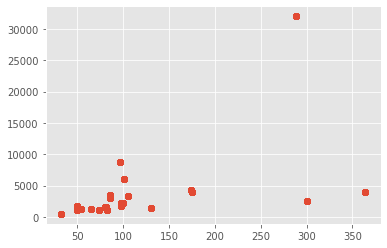

In [0]:
#Visualizing the relationship between the target variable (Rent) and the independent variable 'Area'
plt.style.use('ggplot')
plt.scatter(data['Area'], data['Rent'])
plt.show()
#we don't see a linear relationship between Area and Rental

In [0]:
#removing outliers
df = df[df.Rent < 6000]
df = df[df.Area < 120]

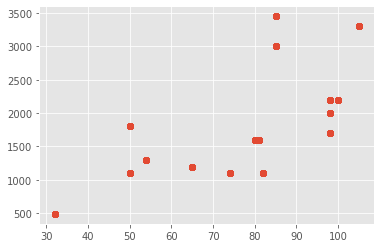

In [0]:
plt.style.use('ggplot')
plt.scatter(df['Area'], df['Rent'])
plt.show()
#we can't identify much linearity between Area and Rental, even after removing some outliers

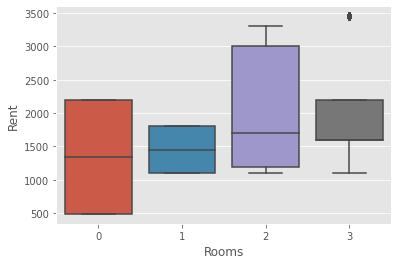

In [0]:
#Boxplot for the number of bedrooms in the houses
ax = sns.boxplot(df['Rooms'], df['Rent'])
#we can see that the variability in the rents were highest for houses without bedrooms(studio) and properties with 2 bedrooms;
#50% of the studios costs from around 1400 below, by month;
#we have an outlier property with 3 bedrooms

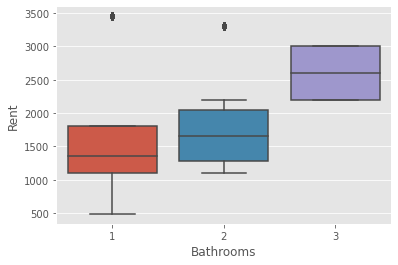

In [0]:
#Boxplot for the number of bathrooms in the houses
ax = sns.boxplot(df['Bathrooms'], df['Rent'])
#the variability of the Rent is more or less the same for all type of properties(1, 2 and 3 bathrooms), there aren't great variability in any of the groups

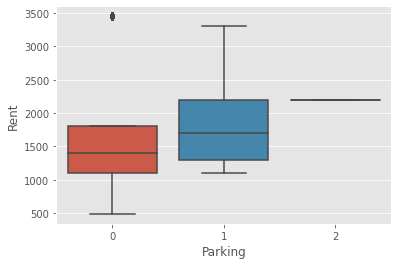

In [0]:
#Boxplot for the number of parkings
ax = sns.boxplot(df['Parking'], df['Rent'])
#there are more variability in the rent for properties with 1 parking space, but it isn't much more compared to that with no parking space;
#we don't have enough data to see the quartiles for properties with 3 parking spaces;
#we have an outlier (very high rent) in the group with no parking space

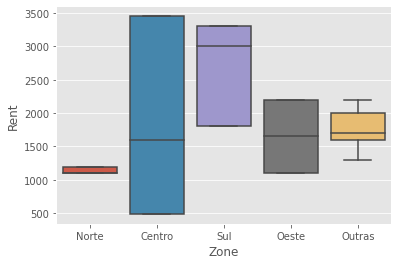

In [0]:
#boxplot by zones
ax = sns.boxplot(df['Zone'], df['Rent'])
#Center zone has the highest variability;
#Norte zone has the lowest variability

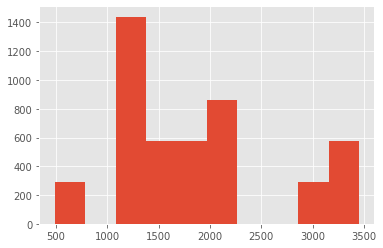

In [0]:
plt.style.use('ggplot')
plt.hist(df['Rent'], 10)
plt.show()
#looking for the histogram of the rents we can see that most of the houses costs around 1100-1400/month

In [0]:
df['Rooms'].value_counts()
#we have more houses with 2 bedrooms, 2016 in total

2    2016
3    1440
1     576
0     576
Name: Rooms, dtype: int64

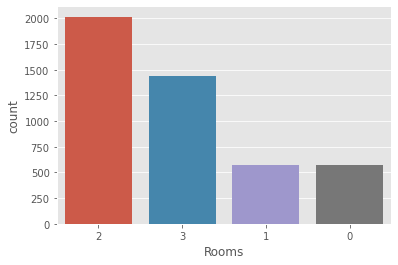

In [0]:
sns.countplot(df.Rooms, order=df['Rooms'].value_counts().index)

In [0]:
df['Bathrooms'].value_counts()
#we have more houses with 2 bathrooms, 2304 in total

2    2304
1    1728
3     576
Name: Bathrooms, dtype: int64

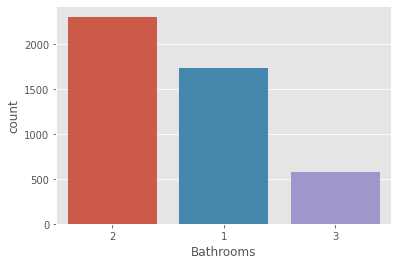

In [0]:
sns.countplot(df.Bathrooms, order=df['Bathrooms'].value_counts().index)

In [0]:
df['Parking'].value_counts()
#we have more houses with one parking space, which is very acceptable

1    2592
0    1728
2     288
Name: Parking, dtype: int64

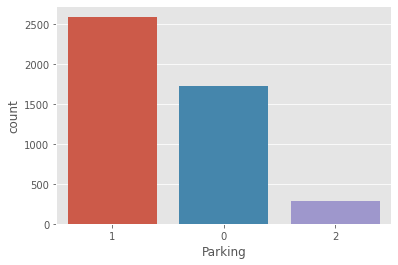

In [0]:
sns.countplot(df.Parking, order=df['Parking'].value_counts().index)

In [0]:
df['Zone'].value_counts()
#we have more properties classified as "Others" in terms of Zone

Outras    1440
Norte      864
Sul        864
Centro     864
Oeste      576
Name: Zone, dtype: int64

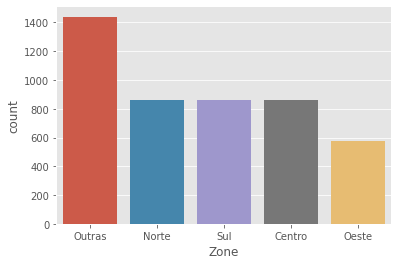

In [0]:
sns.countplot(df.Zone, order=df['Zone'].value_counts().index)

No handles with labels found to put in legend.


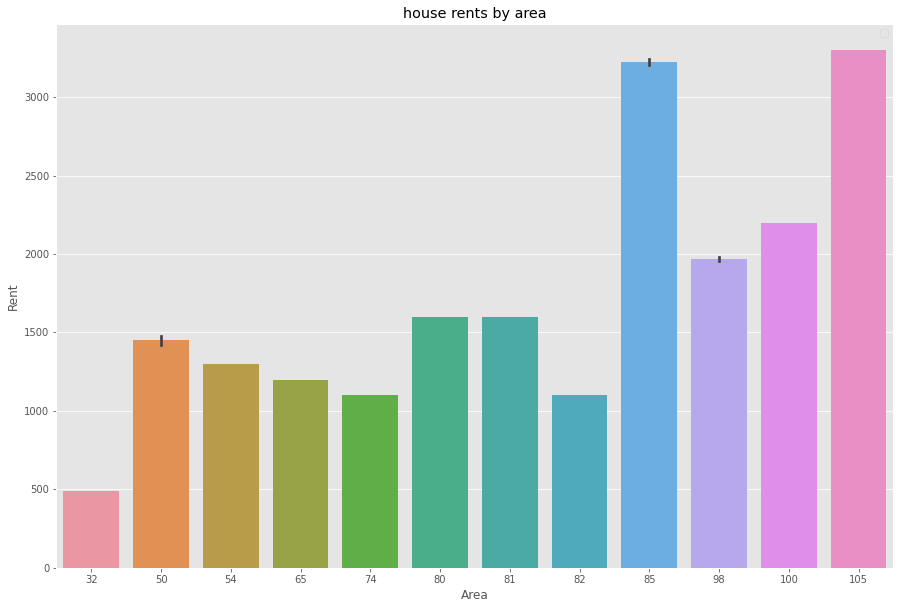

In [0]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
plt.title("house rents by area")
plt.xlabel('area')
plt.ylabel('house rents')
plt.legend()
sns.barplot(x='Area',y='Rent',data=df)
#we can see that, in general, properties with bigger area have a higher rent

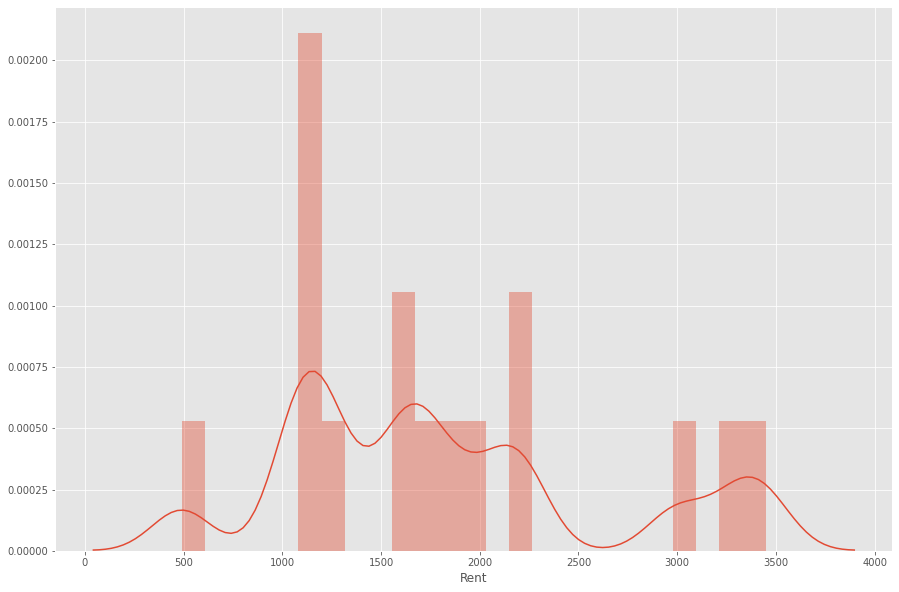

In [0]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,10))
sns.distplot(df['Rent'],hist=True,kde=True,rug=False,label='Area',norm_hist=True)
#the density suggests a multi-modal density

In [0]:
#mean, median and mode for the rents
print('Mean',round(df['Rent'].mean(),2))
print('Median',df['Rent'].median())
print('Mode',df['Rent'].mode()[0])
#as we have more properties with 2 bedrooms, the mean value of 1821.25 is a bit low,
#but most of data are classified as "Others" in terms of Zone. Taking this into account, this relatively low mean value could be explained;
#If most properties were on the Sul Zone, the mean rent would be higher than this, considering the Sul zone is a noble in Greater Rio de Janeiro

Mean 1821.25
Median 1650.0
Mode 1100


In [0]:
print('Mean',round(df['Area'].mean(),2))
print('Median',df['Area'].median())
print('Mode',df['Area'].mode()[0])

Mean 77.31
Median 81.5
Mode 98


#The Model

In [0]:
#train and test sets
X = df['Rent']
y = df['Area']
train, test = train_test_split(df, train_size=0.8, random_state = 0)
X_train = np.array(train['Area']).reshape(-1,1)
y_train = np.array(train['Rent']).reshape(-1,1)
print(X_train.shape)
print(y_train.shape)
#we are setting 80% of the data as train set, 20% as test set

(3686, 1)
(3686, 1)


In [0]:
#first, let us fit a linear regression model
LinReg = linear_model.LinearRegression()

In [0]:
#first we are considering a model with only one feature, the area
LinReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
X_test = np.array(test['Area']).reshape(-1,1)
y_test = np.array(test['Rent']).reshape(-1,1)

In [0]:
#getting the predicted values
predictions = LinReg.predict(X_test)

In [0]:
print('Linear Model:')
MSE = sklearn.metrics.mean_squared_error(y_test, predictions)
print('MSE', round(np.sqrt(MSE),2))
print('R squared training',round(LinReg.score(X_train,y_train),3))
print('R squared testing',round(LinReg.score(X_test,y_test),3) )
print('intercept',LinReg.intercept_)
print('coefficient',LinReg.coef_)
#we got a coefficient of determination of only 0.441, which is not so good and is not
#a surprise, considering we have already seen that the relationship
#between Area and Rent doesn't tend to be linear

Linear Model:
MSE 620.12
R squared training 0.423
R squared testing 0.441
intercept [-136.07660932]
coefficient [[25.32255741]]


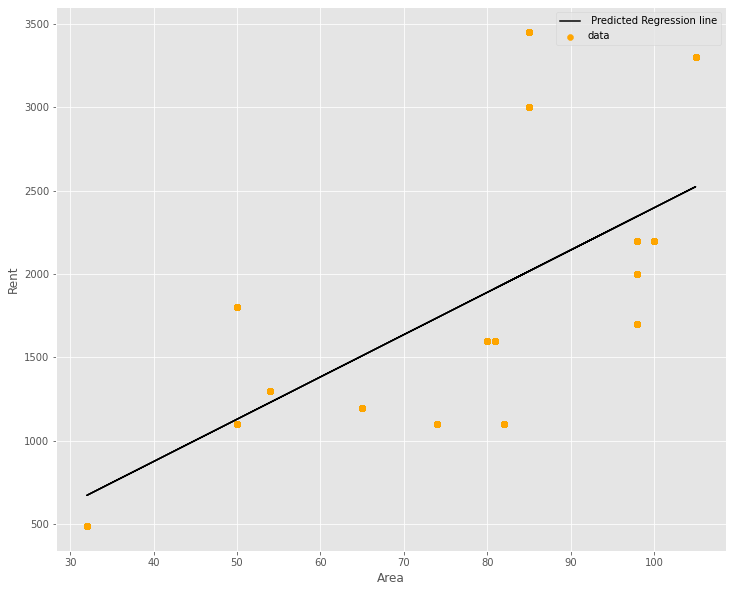

In [0]:
_, ax = plt.subplots(figsize= (12, 10))
plt.scatter(X_test, y_test, color= 'orange', label = 'data')
plt.plot(X_test, LinReg.predict(X_test), color='black', label= ' Predicted Regression line')
plt.xlabel('Area')
plt.ylabel('Rent')
plt.legend()
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
#we can see graphically that a linear regression with one feature (Area) is not a good model

In [0]:
#including more features in the model
features_main = ['Area', 'Rooms', 'Bathrooms', 'Parking']
multi_reg = linear_model.LinearRegression()
multi_reg.fit(train[features_main], train['Rent'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
#predictions after including more features
predictions = multi_reg.predict(test[features_main])

In [0]:
print('Multi Linear Model:')
MSE=sklearn.metrics.mean_squared_error(y_test,predictions)
print('mean squared error(MSE)', round(np.sqrt(MSE),2))
print('R squared training',round(multi_reg.score(train[features_main],train['Rent']),3))
print('R squared testing', round(multi_reg.score(test[features_main],test['Rent']),3))
print('Intercept: ', multi_reg.intercept_)
print('Coefficient:', multi_reg.coef_)
#now we got a coefficient of determination of 0.509, which is better but not yet satisfactory, again indicating that a linear fit is not a good idea

Multi Linear Model:
mean squared error(MSE) 580.72
R squared training 0.493
R squared testing 0.509
Intercept:  -547.054827091426
Coefficient: [  31.80236686    3.21076033  148.46019677 -518.05097358]


In [0]:
#let us fit a polynomial regression with degree 2
polyfeat=PolynomialFeatures(degree=2)
xtrain_poly=polyfeat.fit_transform(train[features_main])
xtest_poly=polyfeat.fit_transform(test[features_main])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train['Rent'])
polypred=poly.predict(xtest_poly)

print('Polynomial Regression (degree=2)')
MSE = sklearn.metrics.mean_squared_error(test['Rent'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(MSE), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train['Rent']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test['Rent']), 3))
#now we got a coefficient of determination of 0.975!

Polynomial Regression (degree=2)
Mean Squared Error (MSE)  130.67
R-squared (training)  0.972
R-squared (testing)  0.975


In [0]:
#fitting a polynomial regression with degree 3
polyfeat=PolynomialFeatures(degree=3)
xtrain_poly=polyfeat.fit_transform(train[features_main])
xtest_poly=polyfeat.fit_transform(test[features_main])

poly=linear_model.LinearRegression()
poly.fit(xtrain_poly,train['Rent'])
polypred=poly.predict(xtest_poly)

print('Polynomial Regression (degree=3)')
MSE = sklearn.metrics.mean_squared_error(test['Rent'], polypred)
print('Mean Squared Error (MSE) ', round(np.sqrt(MSE), 2))
print('R-squared (training) ', round(poly.score(xtrain_poly, train['Rent']), 3))
print('R-squared (testing) ', round(poly.score(xtest_poly, test['Rent']), 3))
#we got again a coefficient of determination of 0.975 for a polynomial regression with degree 3;
#as nothing changed moving from degree=2 to degree=3, we conclude that a polynomial regression
#with degree=2 is our best model

Polynomial Regression (degree=3)
Mean Squared Error (MSE)  130.67
R-squared (training)  0.972
R-squared (testing)  0.975
